In [87]:
#Multiple regression model to determine car values based on a variety of characteristics such as mileage, 
#make, model, engine size, interior style, and cruise control

In [88]:
#Price: suggested retail price of the used 2005 GM car in excellent condition. 
#The condition of a car can greatly affect price. 
#All cars in this data set were less than one year old when priced and considered to be in excellent condition.
#Mileage: number of miles the car has been driven
#Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
#Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
#Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
#Type: body type such as sedan, coupe, etc.      
#Cylinder: number of cylinders in the engine        
#Liter: a more specific measure of engine size     
#Doors: number of doors           
#Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
#Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
#Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [89]:
#The Need for Multiple Regression: Regress Price on number of Cylindrs in the car

In [90]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


In [91]:
df=pd.read_csv("C:/Users/adith/Desktop/Assignment2_Ads/dataset_new.csv")

In [92]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null int64
Make        804 non-null object
Model       804 non-null object
Trim        804 non-null object
Type        804 non-null object
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [94]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073875,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995020,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316635,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [95]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [96]:
df1=df.dropna()

In [97]:
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [98]:
df1.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

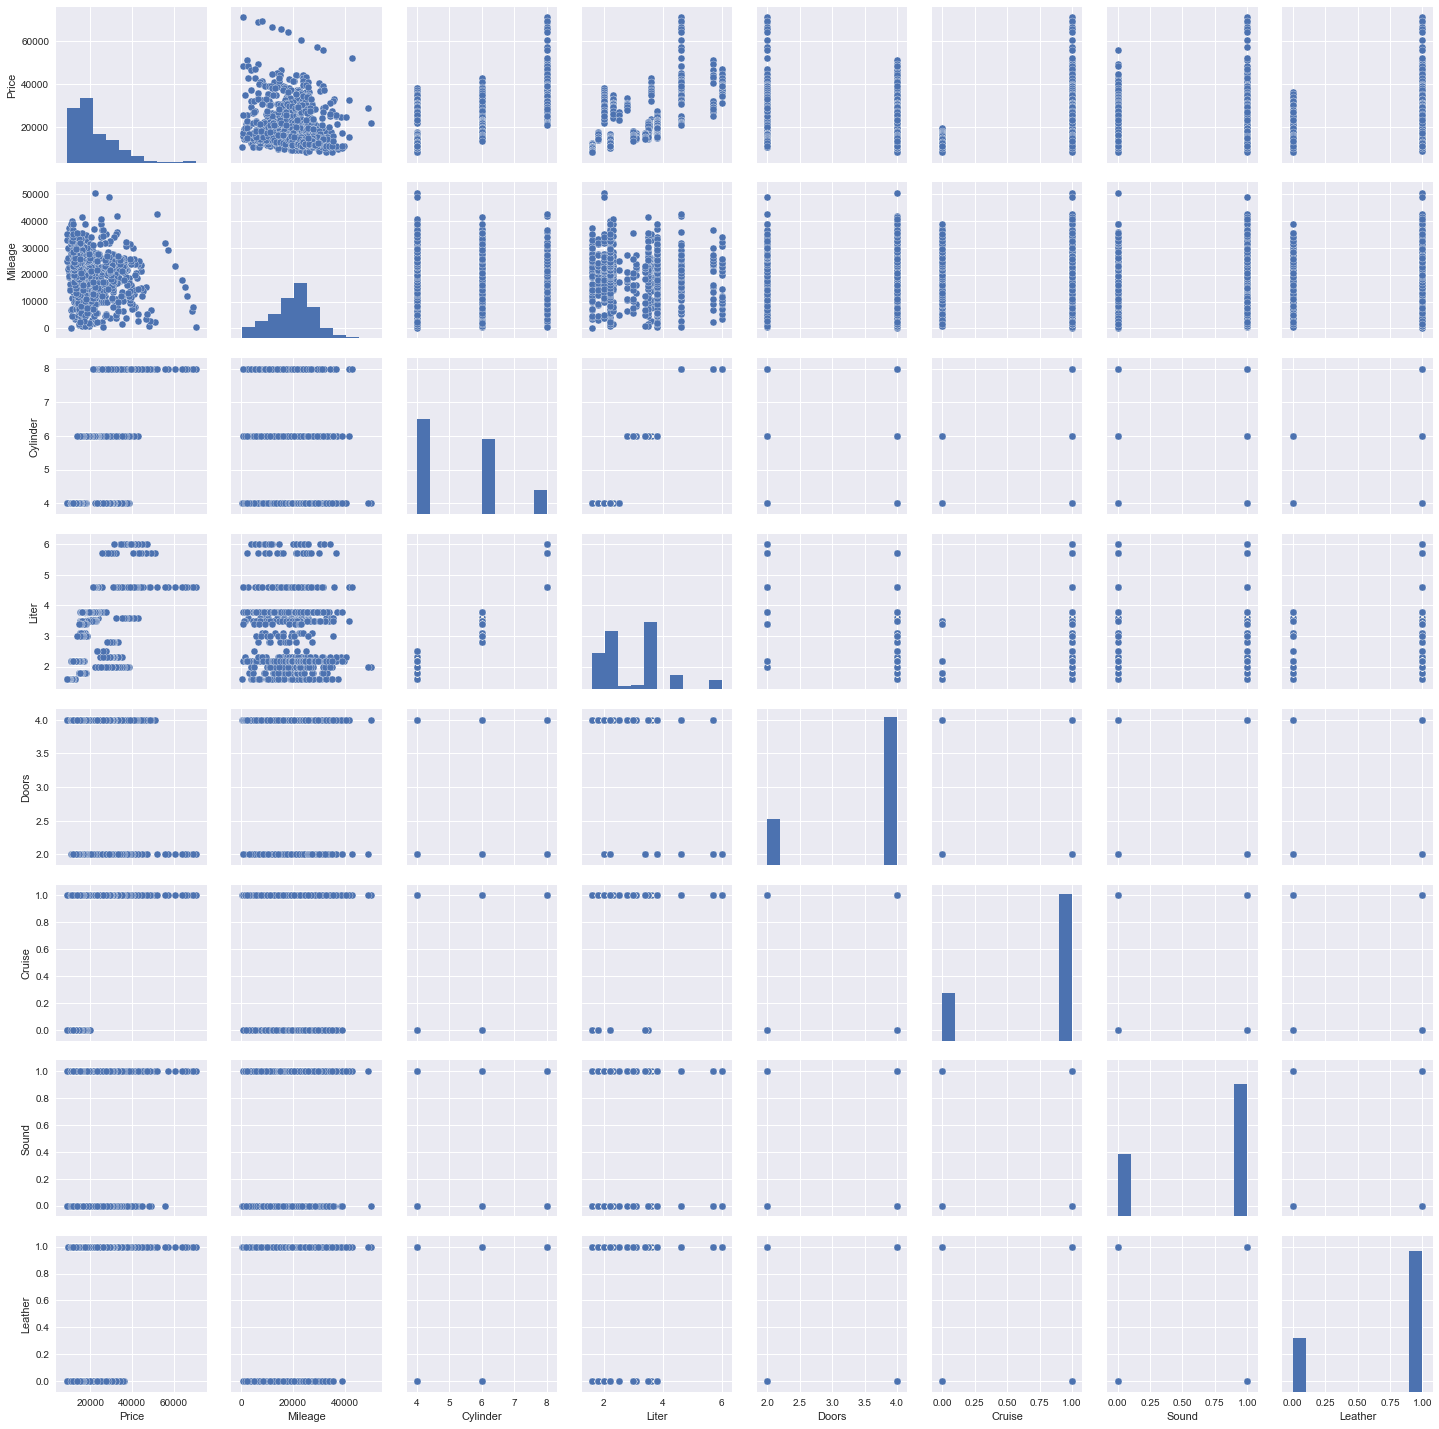

In [99]:
sns.pairplot(df1)

# Q1) Checking if the relationship is significant.

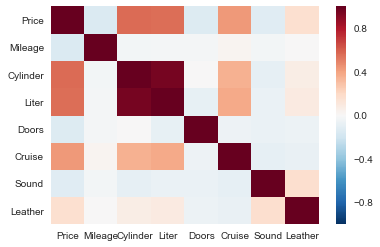

In [100]:
sns.heatmap(df1.corr())

           Mileage  Cylinder     Liter     Doors    Cruise     Sound  \
Mileage   1.000000 -0.029461 -0.018641 -0.016944  0.025037 -0.026146   
Cylinder -0.029461  1.000000  0.957897  0.002206  0.354285 -0.089704   
Liter    -0.018641  0.957897  1.000000 -0.079259  0.377509 -0.065527   
Doors    -0.016944  0.002206 -0.079259  1.000000 -0.047674 -0.062530   
Cruise    0.025037  0.354285  0.377509 -0.047674  1.000000 -0.091730   
Sound    -0.026146 -0.089704 -0.065527 -0.062530 -0.091730  1.000000   
Leather   0.001005  0.075520  0.087332 -0.061969 -0.070573  0.165444   
Price    -0.143051  0.569086  0.558146 -0.138750  0.430851 -0.124348   

           Leather     Price  
Mileage   0.001005 -0.143051  
Cylinder  0.075520  0.569086  
Liter     0.087332  0.558146  
Doors    -0.061969 -0.138750  
Cruise   -0.070573  0.430851  
Sound     0.165444 -0.124348  
Leather   1.000000  0.157197  
Price     0.157197  1.000000  


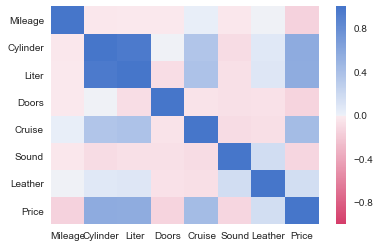

In [101]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df1[['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',"Price",]].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [102]:
#The relationship seems to be significant between
#Price and Liter
#Price and Cylinder
#Price and Cruise

# Q2)Checking if any assumptions are violated!

In [103]:
#Assumption 1: All the independant variables must be correlated to dependant variable.

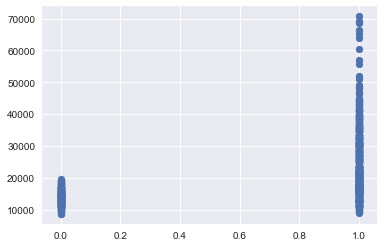

In [104]:
plt.scatter('Cruise','Price',data=df1)

In [105]:
#As price is the dependant variable, cruise is correlated to price and not violating the assumption

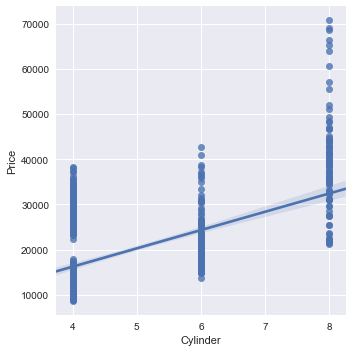

In [106]:
sns.lmplot(x='Cylinder',y='Price',data=df1)

In [107]:
#As price is the dependant cylinder, cylinderS is correlated to price and not violating the assumption

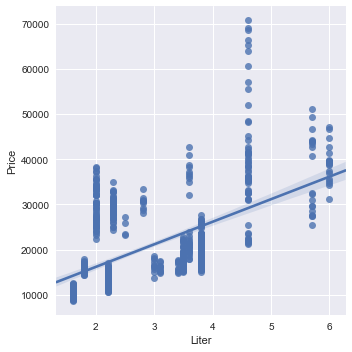

In [108]:
sns.lmplot(x='Liter',y='Price',data=df1)

In [109]:
#As price is the dependant variable, Liter is correlated to price and not violating the assumption

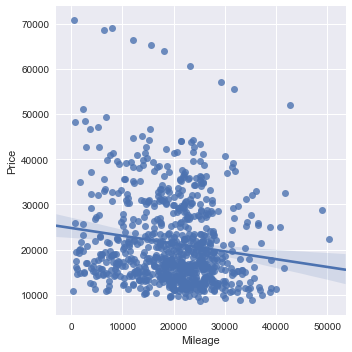

In [110]:
sns.lmplot(x='Mileage',y='Price',data=df1)

In [111]:
#As price is the dependant variable, mileage is correlated to price and not violating the assumption

In [112]:
#Assumption 2:checking if all independant variables are not correlated to each other

# Q4. Checking if predictor variables are independent

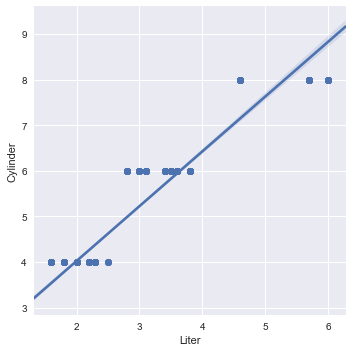

In [113]:
sns.lmplot(x='Liter',y='Cylinder',data=df1)

In [114]:
#Seems Liter and Cylinder are correlated to each other. So we can take either Liter or cylinder

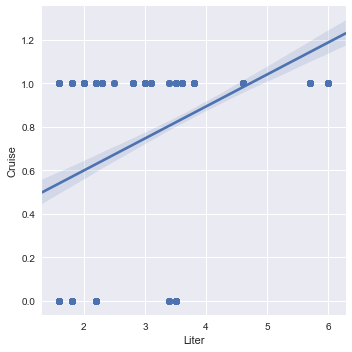

In [115]:
sns.lmplot(x='Liter',y='Cruise',data=df1)

In [116]:
#Seems Liter and Cruise are correlated to each other. So we can take either Liter or Cruise

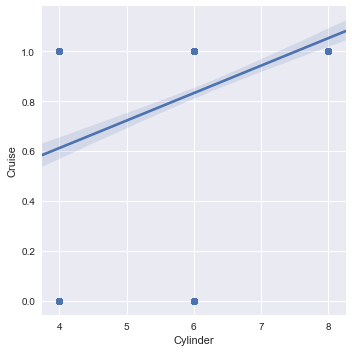

In [117]:
sns.lmplot(x='Cylinder',y='Cruise',data=df1)

In [118]:
#Seems cruise and Cylinder are not correlated to each other. So we can take both cruise or cylinder

In [119]:
x = df1[['Cruise','Cylinder','Liter']]
y = df1['Price']

# Q3)checking the multicolinearity

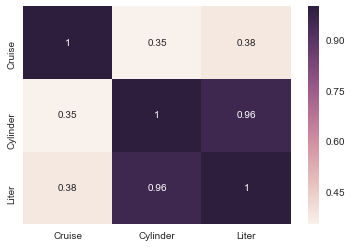

In [120]:
sns.heatmap(x.corr() ,annot=True)

In [121]:
#Taking Cruise and Liter as independant variables as they do not have correlations to each other and they have correlation with the depandent variable as shown in the heat map.

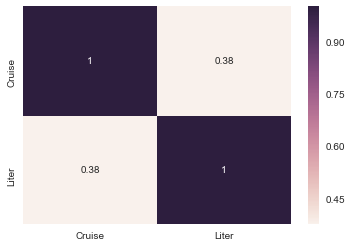

In [122]:
x = df1[['Cruise','Liter']]
y = df1['Price']
sns.heatmap(x.corr() ,annot=True)

from sklearn.model_selection import train_test_split

# Q5) Ranking the most significant predictor and ignoring rest.


In [123]:
#Cruise and Liter are the most significant predictor and ignoring cylinder

# Q6)Does the model makes sense?

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression()

In [127]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# print the intercept
print(lm.intercept_)


5264.86542194


In [129]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Cruise,6395.558506
Liter,3740.367179


In [130]:
#Interpreting the coefficients:
#Holding all other features fixed, a 1 unit increase in Cruise is associated with an increase of 6395.558506 total dollars on car price.
#Holding all other features fixed, a 1 unit increase in Liter capacity is associated with an increase of 3740.367179 total dollars on car price.

In [131]:
#predictions

In [132]:
predictions = lm.predict(x_test)

In [133]:
print(predictions)

[ 19141.15828499  25873.81920671  25873.81920671  13493.67321515
  25873.81920671  24377.67233522  19889.23172074  25873.81920671
  19141.15828499  25873.81920671  25873.81920671  11249.45290791
  25873.81920671  19141.15828499  18356.1505475   25873.81920671
  19141.15828499  19141.15828499  13493.67321515  18356.1505475
  13493.67321515  20263.26843861  25873.81920671  24751.70905309
  28866.1129497   25873.81920671  24751.70905309  18393.08484925
  19889.23172074  19889.23172074  11997.52634366  13493.67321515
  28866.1129497   24751.70905309  22133.45202798  19141.15828499
  19141.15828499  20263.26843861  19889.23172074  25873.81920671
  34102.62699992  19889.23172074  19889.23172074  13493.67321515
  28866.1129497   18356.1505475   25125.74577097  19889.23172074
  34102.62699992  25873.81920671  20263.26843861  25873.81920671
  25873.81920671  11997.52634366  23255.5621816   18393.08484925
  11249.45290791  19889.23172074  19889.23172074  34102.62699992
  13493.67321515  28866.11

In [134]:
lm = sm.OLS(y_train, x_train)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2455.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):          3.29e-301
Time:                        21:54:06   Log-Likelihood:                -6695.9
No. Observations:                 643   AIC:                         1.340e+04
Df Residuals:                     641   BIC:                         1.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cruise      6689.0352    770.105      8.686      0.000    5176.802    8201.268
Liter       5222.1757    203.957     25.604      0.000    4821.672    5622.680
==============================================================================
Omnibus:                      149.135   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.510
Skew:                           1.231   Prob(JB):                     8.47e-74
Kurtosis:                       5.550   Cond. No.                         8.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

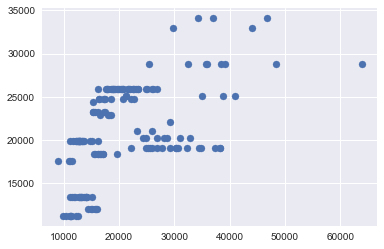

In [135]:
plt.scatter(y_test,predictions)

In [136]:
from sklearn import metrics

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5822.80107674
MSE: 55849902.6407
RMSE: 7473.27924279


In [138]:
#Residual Histogram

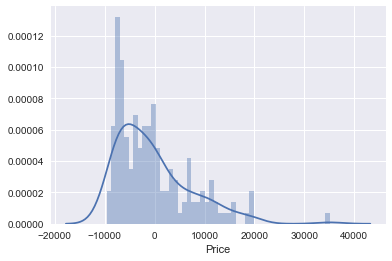

In [139]:
sns.distplot((y_test-predictions),bins=50);

# Q7) Does the regularization help?

In [140]:
##We can conclude the observation by checking the coefficients.We have seen if we can interpret the coefficients at all to get an idea.

##By the values we got from it, we can say:
    #Interpreting the coefficients:
##Holding all other features fixed, a 1 unit increase in Cruise is associated with an increase of 6395.558506 total dollars on car price.
##Holding all other features fixed, a 1 unit increase in Liter capacity is associated with an increase of 3740.367179 total dollars on car price.
    
